In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


In [109]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [110]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [111]:
# Display the data table for preview
merged_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [112]:
# Checking the number of mice.

num_mice = merged_results['Mouse ID'].nunique()
num_mice

249

In [113]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_results.groupby(["Mouse ID", "Timepoint"])

In [114]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [115]:
# Checking the number of mice in the clean DataFrame.

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

drug_types = merged_results.groupby('Drug Regimen')

mean = merged_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = merged_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

drug_summary = pd.DataFrame ({"Mean" : mean,
                              "Median" : median,
                              "Variance" : variance,
                              "Standard Deviation" : std_dev,
                              "SEM" : sem})

drug_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


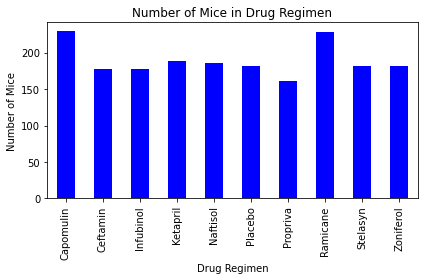

In [117]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

tot_treatment_mice = drug_types['Mouse ID'].count()
bar_pandas = tot_treatment_mice.plot(kind="bar", title="Number of Mice in Drug Regimen", facecolor="blue")
plt.ylabel("Number of Mice")
plt.tight_layout()


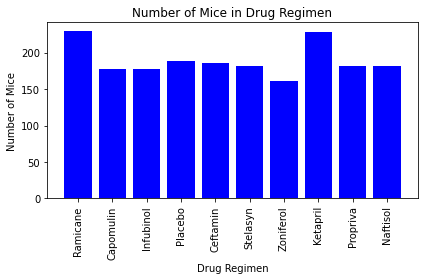

In [118]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_types_bar = merged_results['Drug Regimen'].unique()
tot_treatment_mice = drug_types['Mouse ID'].count()

x_axis = np.arange(len(drug_types_bar))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.bar (x_axis, tot_treatment_mice, color="blue",)
plt.xticks(tick_locations, drug_types_bar, rotation="vertical")
plt.title ("Number of Mice in Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.show()


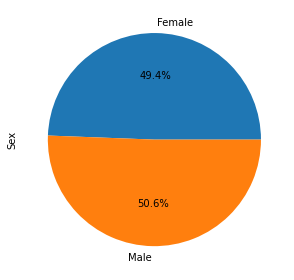

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = merged_results.groupby('Sex')['Sex'].count()
gender_pandas = mice_gender.plot(kind="pie", y="Sex", autopct="%1.1f%%")
plt.tight_layout()


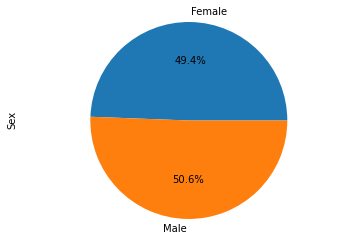

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = merged_results.groupby('Sex')['Sex'].count()
labels = ["Female", "Male"]
plt.pie(gender_count, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


In [133]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merged_results.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_summary = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merge = pd.merge(merged_results, last_timepoint_summary, on=['Mouse ID', 'Timepoint'])


In [142]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capm = []
tumor_rami = []
tumor_infu = []
tumor_ceft = []


In [143]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capo_df = new_merge.loc[new_merge['Drug Regimen'] == "Capomulin", :]

tumor_capo = capo_df['Tumor Volume (mm3)']

quartiles = tumour_capo.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
        
print(f"Potential outliers for Capomulin are tumors with volume size between {lower_bound} and {upper_bound}")


Potential outliers for Capomulin are tumors with volume size between 20.70456164999999 and 51.83201549


In [144]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

rami_df = new_merge.loc[new_merge['Drug Regimen'] == "Ramicane", :]

tumor_rami = rami_df['Tumor Volume (mm3)']

quartiles = tumour_rami.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
        
print(f"Potential outliers for Ramicane are tumors with volume size between {lower_bound} and {upper_bound}")


Potential outliers for Ramicane are tumors with volume size between 17.912664470000003 and 54.30681135


In [145]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

infu_df = new_merge.loc[new_merge['Drug Regimen'] == "Infubinol", :]

tumor_infu = infu_df['Tumor Volume (mm3)']

quartiles = tumour_infu.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
        
print(f"Potential outliers for Infubinol are tumors with volume size between {lower_bound} and {upper_bound}")


Potential outliers for Infubinol are tumors with volume size between 36.83290494999999 and 82.74144559000001


In [146]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

ceft_df = new_merge.loc[new_merge['Drug Regimen'] == "Ceftamin", :]

tumor_ceft = ceft_df['Tumor Volume (mm3)']

quartiles = tumour_ceft.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
        
print(f"Potential outliers for Ceftamin are tumors with volume size between {lower_bound} and {upper_bound}")


Potential outliers for Ceftamin are tumors with volume size between 25.355449580000002 and 87.66645829999999


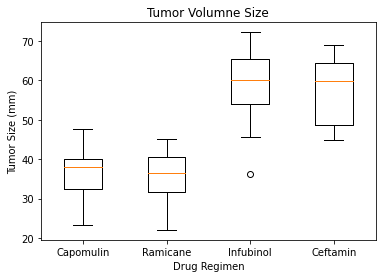

In [155]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_sizes = [tumor_capo, tumor_rami, tumor_infu, tumor_ceft]

fig, ax1 = plt.subplots()
ax1.set_title('Tumor Volumne Size')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Size (mm)')
ax1.boxplot(tumor_sizes, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


In [165]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Find mouse g288 using capo_df

mouse_g288 = merged_results.loc[merged_results['Mouse ID'] == 'g288']

mouse_g288

ply.plt

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
235,g288,Capomulin,Male,3,19,0,45.000000,0
236,g288,Capomulin,Male,3,19,5,45.839400,0
237,g288,Capomulin,Male,3,19,10,46.304003,1
238,g288,Capomulin,Male,3,19,15,42.172301,1
239,g288,Capomulin,Male,3,19,20,42.957120,1
240,g288,Capomulin,Male,3,19,25,42.368692,1
241,g288,Capomulin,Male,3,19,30,42.874461,1
242,g288,Capomulin,Male,3,19,35,38.954115,1
243,g288,Capomulin,Male,3,19,40,36.356851,1
244,g288,Capomulin,Male,3,19,45,37.074024,1


In [164]:
find_mouse

NameError: name 'find_mouse' is not defined